# Improving  a Classififcation Model

**First Prediction : Baseline Prediction**

**First Model : Baseline Model**

### Improving a Machine Learning Model depends on two Perspective :

**A.From a Data Perspective**

* **Could we Collect more Data ? (Generally More Data, More Training, More Patterns, Better Accuracy and Better Model)**

* **Could we Improve our Data ? (Data Cleaning, Adding New Feature or Remove Unnecessary Feature : Dimensionality Reduction)**

**B.From a Model Perspective**

* **Is there any Better Model we can use for Training our Data ? (Try Estimators Like Random Forest Classifier)**

* **Could we Improve the Current Model ? (Improving Parameters and Adjusting Hyperparameters)**

### Parameters vs Hyperparameters

**Parameters : Model Find this Patterns in Data. (By Default Parameters Value)**

**Hyperparameters : Setting Parameter Values we can Adjust to Improve its Ability to Find Patterns.**

### Ways to Adjust Hyperparameters :

**A.Adjust Manually**

**B.Random Search Cross Validation**

**C.Grid Search Cross Validation**

---------------------------------------------------------------------------------------------------------------------------

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

**Import Data Set**

In [2]:
Heart = pd.read_csv('Heart Disease.csv')

Heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Splitting the Data into Independent Features and Dependent Feature**

In [3]:
np.random.seed(101)

Heart_Shuffled = Heart.sample(frac=1) # Shuffle the Data using Pandas Sample Function.

X = Heart_Shuffled.drop('target', axis = 'columns')

Y = Heart_Shuffled['target']

**Splitting the Data into Training, Validation and Testing Set**
<img src = "Train Valid Test Sets.png">

In [4]:
Train_Set = round(0.7 * len(Heart_Shuffled)) # 70% of Shuffled Train Set

Valid_Set = round(Train_Set + 0.15 * len(Heart_Shuffled)) # 15% of Validate Set 

X_Train, Y_Train = X[: Train_Set], Y[: Train_Set]

X_Valid, Y_Valid = X[Train_Set : Valid_Set], Y[Train_Set : Valid_Set]

X_Test, Y_Test = X[Valid_Set :], Y[Valid_Set :]

print(f'70% of Train Data Set : {len(X_Train)} \n15% of Validate Data Set : {len(X_Valid)} \n15% of Test Data Set : {len(X_Test)}')

70% of Train Data Set : 212 
15% of Validate Data Set : 45 
15% of Test Data Set : 46


**Using Random Forest Classifier**

In [5]:
from sklearn.ensemble import RandomForestClassifier

**Instantiate Random Forest Classifier Model Object**

In [6]:
RFC = RandomForestClassifier()

**Fit the Model on Training Data to Learn Pattern**

In [7]:
RFC.fit(X_Train, Y_Train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**Creating Function for Evaluation Metrics of Classification Model**

In [8]:
def Evaluate(Y_Test, Predictions) :
    '''
    
    Performs Evaluation of Classification Model
    
    Compares Y_Test and Prediction made by the Model
    
    Returns Classification Evaluation Metrics.
    
    Parameters 
    
    ----------
    
    Y_Test : also known as Y_True, Actual Labels of X_Test Data Set used to Compare with the Predictions.
    
    Predictions : Y_Prediction, Predictions made by Classification Model. 
    
    '''
    
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    
    Accuracy = accuracy_score(Y_Test, Predictions)
    
    Precision = precision_score(Y_Test, Predictions)
    
    Recall = recall_score(Y_Test, Predictions)
    
    F1 = f1_score(Y_Test, Predictions)
    
    Metric = {'Accuracy Score' : round(Accuracy,2), 
              
              'Precision Score' : round(Precision,2),
              
              'Recall Score' : round(Recall,2),
              
              'F1 Score' : round(F1,2)}
    
    print(f'Accuracy Score : {Accuracy * 100:.2f}%')
    
    print(f'Precision Score : {Precision * 100:.2f}%')
    
    print(f'Recall Score : {Recall * 100:.2f}%')
    
    print(f'F1 Score : {F1 * 100:.2f}%')
    
    return Metric

**Make Prediction on Validation Set**

In [9]:
RFC_Prediction = RFC.predict(X_Valid)

**Evaluate the Classification Model on Validation Set**

In [10]:
Baseline_Metric = Evaluate(Y_Valid, RFC_Prediction)

Accuracy Score : 66.67%
Precision Score : 71.43%
Recall Score : 62.50%
F1 Score : 66.67%


**Parameters of the Random Forest Classifier Model**

In [11]:
print(RFC.get_params())

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


## A. Adjust Hyperparameter Manually

**We are going to Adjust (Not Actually)**

* **1.n_estimators**

* **2.max_depth**

* **3.max_features**

* **4.min_samples_leaf**

* **5.min_samples_split**

**1.Adjusting n_estimators**

In [12]:
RFC1 = RandomForestClassifier(n_estimators=100)

In [13]:
RFC1.fit(X_Train, Y_Train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
RFC1_Prediction = RFC1.predict(X_Valid)

**Evaluation of Model**

In [15]:
Adjusted_Metric = Evaluate(Y_Valid, RFC1_Prediction)

Accuracy Score : 73.33%
Precision Score : 73.08%
Recall Score : 79.17%
F1 Score : 76.00%


**Comparing the Baseline Evaluation and Evaluation after Adjusting a Hyperparameter**

In [16]:
print('Baseline Evaluation : ')
print()
print(Evaluate(Y_Valid,RFC_Prediction))
print('\n')
print('Evaluation After Adjusting n_estimators :')
print()
print(Evaluate(Y_Valid, RFC1_Prediction))

Baseline Evaluation : 

Accuracy Score : 66.67%
Precision Score : 71.43%
Recall Score : 62.50%
F1 Score : 66.67%
{'Accuracy Score': 0.67, 'Precision Score': 0.71, 'Recall Score': 0.62, 'F1 Score': 0.67}


Evaluation After Adjusting n_estimators :

Accuracy Score : 73.33%
Precision Score : 73.08%
Recall Score : 79.17%
F1 Score : 76.00%
{'Accuracy Score': 0.73, 'Precision Score': 0.73, 'Recall Score': 0.79, 'F1 Score': 0.76}


**2.Adjusting max_depth**

**3.Adjusting max_features .....**

**It's a Kind of Trial and Error, We will have to keep Adjusting until we det Desired Prediction, it will take More Time.**

### So, There is Scikit Learn Method to Save the Time and Effort.

**Scikit Learn will Adjust the Parameters on it's own**

## B. Randomized Search Cross Validation

**Hyperparameter Tuning with Randomized Search Cross Validation**

**Splitting the Data Set into Independent Features and Dependent Feature**

In [17]:
np.random.seed(101)

X = Heart_Shuffled.drop('target', axis = 'columns')

Y = Heart_Shuffled['target']

**Splitting the Data into Training Set and Testing Set (Using Cross Validation, so No need to form Validation Set Manually)**

In [18]:
from  sklearn.model_selection import train_test_split

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.3)

In [19]:
print(f'70% of Train Set : {len(X_Train)} and Labels of Train Set : {len(Y_Train)}')
print()
print(f'30% of Train Set : {len(X_Test)} and Labels of Test Set : {len(Y_Test)}')

70% of Train Set : 212 and Labels of Train Set : 212

30% of Train Set : 91 and Labels of Test Set : 91


**Import Randomized Search Cross Validation**

In [20]:
from sklearn.model_selection import RandomizedSearchCV

**Set Parameters**

In [21]:
Parameters = {'n_estimators' : [100, 200, 300, 400, 500],
              'max_depth' : [None, 5, 10, 15, 20],
              'max_features' : ['auto', 'sqrt'],
              'min_samples_split' : [2, 4, 6],
              'min_samples_leaf' : [1, 2, 4]}

**Instantiate Random Forest Classifier**

In [22]:
RFC = RandomForestClassifier(n_jobs=1)

**Set Randomized Search Cross Validation on Hyperparameters**

In [23]:
RSCV = RandomizedSearchCV(estimator= RFC, # Model 
                          param_distributions=Parameters, # Parameters of the Model
                          n_iter=10,    # Number of Iterations to Perform
                          cv = 5,       # 5 Fold Cross Validation
                          verbose = 2)  

# Verbose : Show Wordy Information regarding the Process Happening inside the Randomized Search Cross Validation.

**Randomized Search Cross Validation implements a Fit, Score Method, Predict and Predict Probability Functions on N iterations and K Fold Cross Validations to find the Best Estimator's Parameters.**

**Fit the Randomized Search Cross Validation Version of Random Forest Classifier**

In [24]:
RSCV.fit(X_Train, Y_Train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=300, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=300, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=300, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=300, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=300, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=300, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=300, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=300, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=300, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=300, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=None 
[CV]  n_estimators=300, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=None, total=   0.5s
[CV] n_estimators=300, min_samples_split=6, min_samples

[CV]  n_estimators=400, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   0.6s
[CV] n_estimators=400, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=400, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   0.8s
[CV] n_estimators=400, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=400, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   0.8s
[CV] n_estimators=400, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=400, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   0.9s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=5, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_sample

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   24.6s finished
C:\Users\kisan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=1, o

**Best Combinations of Parameters**

In [25]:
print(RSCV.best_params_)

{'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 15}


**Randomized Search Cross Validations Auomatically selects the Best Parameters for Predictions and Evaluations**

In [26]:
RSCV_Prediction = RSCV.predict(X_Test)

**Evaluating the Predictions**

In [27]:
RSCV_Metric = Evaluate(Y_Test, RSCV_Prediction)

Accuracy Score : 81.32%
Precision Score : 80.85%
Recall Score : 82.61%
F1 Score : 81.72%


**You can Observe the Differnce, The Prediction can be Improved Further by Adjusting Hyperparameters, trying Different Combinations of Parameters easily in Randomized Search Cross Validation.**

## C. Grid Search Cross Validation

**Hyperparameter Tunning with Grid Search Cross Validation**

**Import Grid Search Cross Validation**

In [28]:
from sklearn.model_selection import GridSearchCV

**Set Parameters**

In [29]:
Parameters_Grid = {'n_estimators' : [200, 300],
                   'max_depth' : [None,5],
                   'max_features' : ['auto', 'sqrt'],
                   'min_samples_split' : [4, 6],
                   'min_samples_leaf' : [2, 4]}

**Set Grid Search Cross Validation**

In [30]:
GSCV = GridSearchCV(estimator = RFC,
                    param_grid = Parameters_Grid,
                    cv = 5,
                    verbose = 2)

**Fit the Grid Search Cross Validation of Random Forest Classifier on Training Data Set**

In [31]:
GSCV.fit(X_Train, Y_Train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=300 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=300, total=   0.4s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=300, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, m

[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=300, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=300, total=   0.5s


[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:   54.5s finished
C:\Users\kisan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=1,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

**Best Combinations of Parameters**

In [32]:
print(GSCV.best_params_)

{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 200}


**Grid Search Cross Validation Prediction**

In [33]:
GSCV_Prediction = GSCV.predict(X_Test)

**Evaluating the Prediction**

In [34]:
GSCV_Metric = Evaluate(Y_Test, GSCV_Prediction)

Accuracy Score : 80.22%
Precision Score : 78.00%
Recall Score : 84.78%
F1 Score : 81.25%


 **Let's Compare Different Model Metrics**

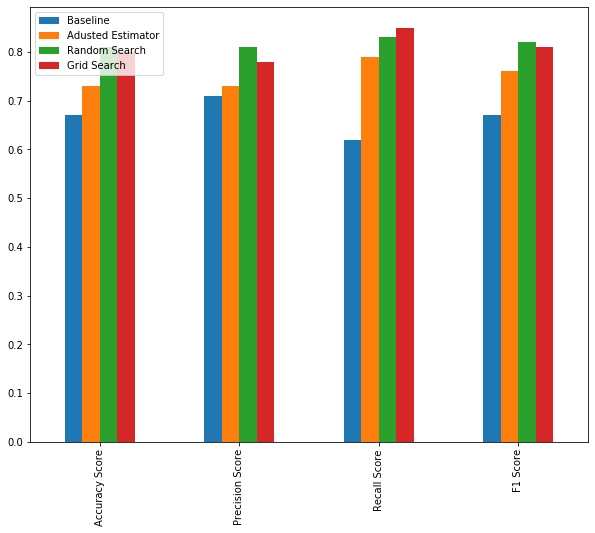

In [35]:
Metrics = pd.DataFrame({'Baseline' : Baseline_Metric,
                        'Adusted Estimator' : Adjusted_Metric,
                        'Random Search' :  RSCV_Metric,
                        'Grid Search' : GSCV_Metric})



Metrics.plot.bar(figsize=(10,8));

**We can Observe that Random Search Cross Validation and Grid Search Cross Validation are way Better than the Baseline and Manually Adjusted Models Predictions, Further to Improve this will Need an Experimentations with these Parameters, Adjusting this Hyperparameter will Definetely give some Better Combinations of Parameter.**